## Problem 1: Set up Github and clone assignment repo. 

At the heart of GitHub is an open source version control system (VCS) called Git. Git is responsible for everything GitHub-related that happens locally on your computer.

To use Git on the command line, you'll need to download, install, and configure Git on your computer.

If you want to work with Git locally, but don't want to use the command line, you can instead download and install the GitHub Desktop client. For more information, see "Getting Started with GitHub Desktop."

If you don't need to work with files locally, GitHub lets you complete many Git-related actions directly in the browser, including:Creating a repository,Forking a repository,Managing files,Being socia

## Problem 2: Sales Data Analysis

In [61]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [62]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

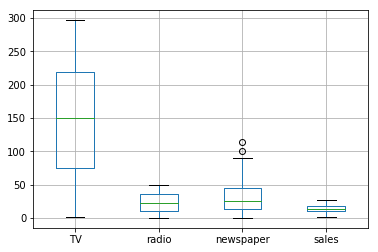

In [63]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [64]:
#plt.scatter(Fill_this_in)

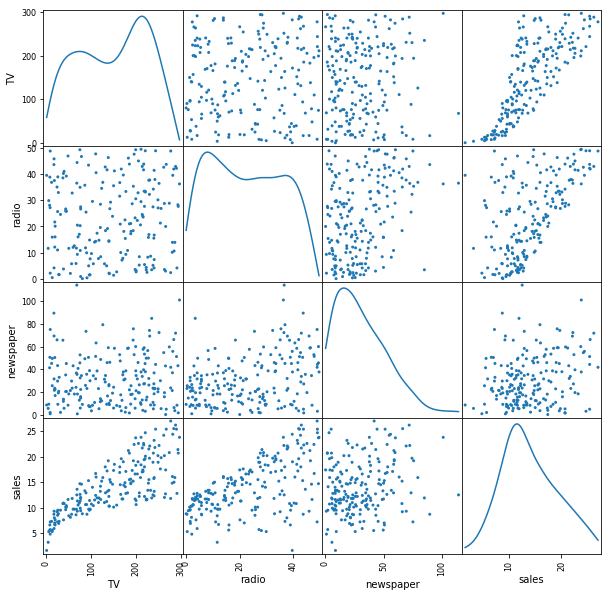

In [65]:
from pandas.plotting import scatter_matrix 
pd.plotting.scatter_matrix(df,alpha=1, figsize=(10,10), diagonal='kde')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

In [66]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Looking at the correlation matrix, we see that there are strong correlations between Radio and Sales and TV and Sales. The correlation of sales with Newspaper is around 0.228, which is not very high.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [67]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [68]:
y = df['sales']

b) Set X to be just the features described above in df

In [69]:
X = df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

d) Train model on training data, and make predictions on testing data

In [71]:
from sklearn import metrics


regr = LinearRegression()


regr.fit(X_train, y_train)


y_pred = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [72]:
print("MSE: %.2f" % metrics.mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

MSE: 2.01
R^2 Score: 0.92


Recalling from lecture, the RMSE is defined as 

$
\begin{equation}
\frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2,
\end{equation}
$

where $\hat y_i$ is our prediction, and $y_i$ is the actual value. The RMSE is harder to interpret overall,
and as such, I prefer not to use it.


The $R^2$ value is defined as:

$
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat y_i)^2}{\sum_i (y_i - \bar y)^2}
\end{equation}
$

This is a more scaling invariant measurement of performance of a model. A score of $0.9$ means that our
mdoel explains 90% of the variance in the model. That's pretty good!

In general, if you have a score of 0.91 or above, you should be skeptical that you may have a causual feature
hidden in your dataset - more on this later. 

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

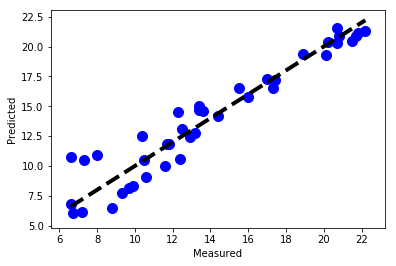

In [73]:
fig,ax = plt.subplots()
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
ax.scatter(y_test,y_pred,100,'b')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Based on the plot above, the model seems quite good (0.91 $R^2$ is very good), and visually the model seems linear with some outliers.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [74]:
# The coefficients
print('intercept：',regr.intercept_)
print('Coefficients: ', regr.coef_)

intercept： 2.8457368646525314
Coefficients:  [0.04537642 0.19330108 0.0005465 ]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Some coefficients are large, but some are small. We can convert each column of X into a range of numbers, such as between [0,1]

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 23 Apr 2018   Prob (F-statistic):           4.83e-98
Time:                        12:19:18   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

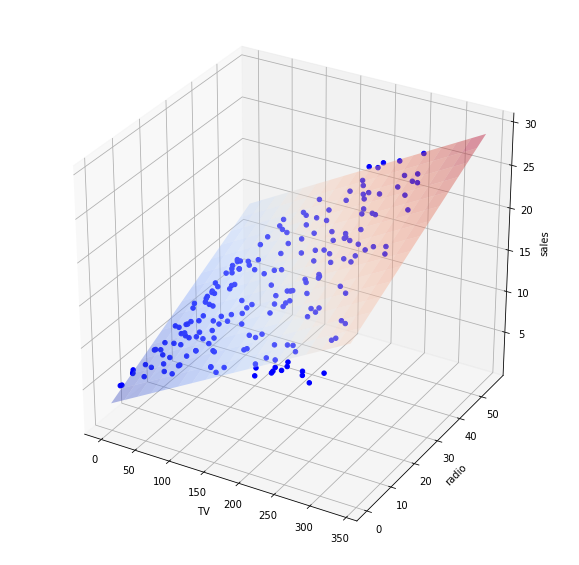

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,out.values.reshape(x_surf.shape),rstride=1, cstride=1,color='None',alpha = 0.4,cmap=cm.coolwarm)
ax.scatter(csv['TV'], csv['radio'], csv['sales'],c='blue',marker='o',alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

# Print OLS regression results
print(fit.summary())
plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -3.1165582062514995e+58, m = -1.585655822608489e+60, error = 6.267874454306815e+123


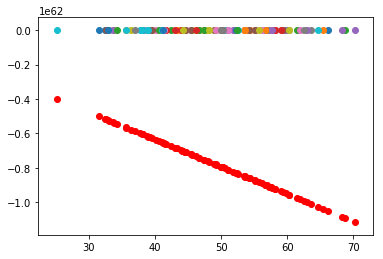

In [76]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("data/data.csv", delimiter=",")
    learning_rate = 0.001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

The learning rate is too low to find the local minimum, leading to iterative dispersion

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

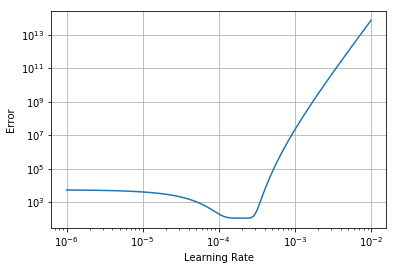

In [77]:
points = genfromtxt("data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-6,-2,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')
plt.loglog(learning_rates,errors,label='num_iterations='+str(num_iterations))
plt.grid()
plt.show()

As can be seen from the above figure, when the learning rate is around $9 \times 10^{-9}$, the error is minimal. Therefore, the learning rate is $9 \times 10^{-9}$.